In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from PIL import Image
import os

In [ ]:
# Freq = [] #no current 
# freq = [] #optimised current

# for file in os.listdir():
#     if file.endswith('current1.npy'):
#         freq.append(file)
#     else:
#         if file.endswith('.npy'):    
#             Freq.append(file)
#         #T.append(os.path.join('',file))
# Freq = sorted(Freq)
# print(Freq)
# print(np.size(Freq))


# freq = sorted(freq)
# print(freq)
# print(np.size(freq))

In [ ]:
# Fmax = []
# for n in range(8):
#     print(n)
#     A = np.load(Freq[n])
#     A = A[ :,100:1300]
#     i,j = np.unravel_index(A.argmax(), A.shape)
#     Fmax.append(A[i,j])


# fmax = []
# for n in range(5):
#     print(n)
#     a = np.load(freq[n])
#     i,j = np.unravel_index(a.argmax(), a.shape)
#     fmax.append(a[i,j])
    

In [ ]:
# Raw data DO NOT TOUCH

Freq1 = [650.504090, 650.5041, 650.50411, 650.50412, 650.50413, 650.50414, 650.50415, 650.50416]
# Freq1 = [-10,0,20,30,40,50,60]#ghz from650.5041
Fmax = [84, 96, 118, 114, 96, 66, 76]

# 250508 2D MOT Replot Latex Font

In [50]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,2.5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

In [ ]:
# Raw data

Freq1 = [650.504090, 650.5041, 650.50411, 650.50412, 650.50413, 650.50414, 650.50415, 650.50416]
# Freq1 = [-10,0,20,30,40,50,60]#ghz from650.5041
Fmax = [84, 96, 118, 114, 96, 66, 76]

In [57]:
resonance = 650.503868 #error bar is 7MHz
freqoffset_2DMOT_ECDL= 0.000275 #error bar is 1MHz
detuning = [np.round((i-freqoffset_2DMOT_ECDL-resonance)*1e6) for i in Freq1] # detuning in MHz
detuning_gamma = np.array(detuning)/32
detuning_gamma

array([-1.65625, -1.34375, -1.03125, -0.71875, -0.40625, -0.09375,
        0.21875,  0.53125])

In [59]:
uncertainty = 8 # MHz
uncertainty_gamma = uncertainty/32

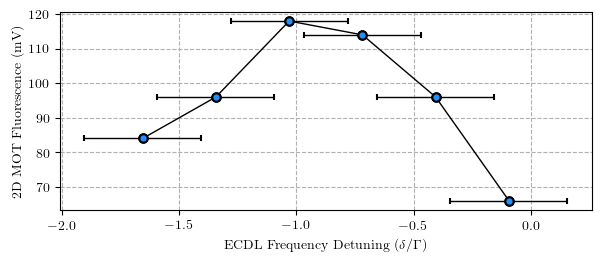

In [72]:
plt.errorbar(detuning_gamma[0:6],Fmax[0:6],xerr=uncertainty_gamma,fmt='o',color='dodgerblue',ecolor='black',capsize=2)
plt.plot(detuning_gamma[0:6],Fmax[0:6],'ko-')
plt.xlabel(r'ECDL Frequency Detuning ($\delta / \Gamma$)')
plt.ylabel('2D MOT Fluorescence (mV)')  
plt.savefig('2D MOT Fluorescence vs ECDL Frequency Detuning.pdf',dpi=300)


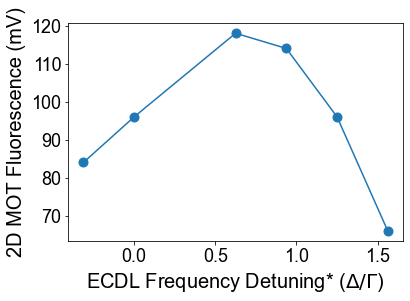

In [ ]:
plt.figure()
plt.rc("font",size=10)
plt.plot([i/32 for i in Freq1[0:6]],Fmax[0:6],'o-',markersize=9)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')
# plt.xticks(np.arange(-0.3,2,0.5))
plt.xlabel(r'ECDL Frequency Detuning* ($\Delta / \Gamma$)',fontname='Arial',fontsize=20,labelpad=5)
plt.ylabel('2D MOT Fluorescence (mV)',fontname='Arial',fontsize=20,labelpad=5)  
plt.savefig('2D MOT Fluorescence vs ECDL Frequency Detuning.png',dpi=300,bbox_inches='tight')
plt.savefig('2D MOT Fluorescence vs ECDL Frequency Detuning.pdf',dpi=300,bbox_inches='tight')

In [ ]:
# from matplotlib import rc
# plt.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial'], 'size': 16})
# plt.rc('text', usetex=True)

In [4]:
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Michael/Dropbox/AION/Projects')  # Replace with the relevant path that contains this script
from plotting_style import set_plotting_style
set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


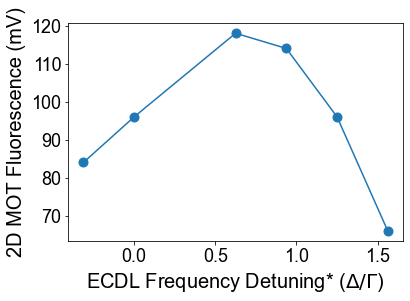

In [6]:
plt.plot([i/32 for i in Freq1[0:6]],Fmax[0:6],'o-',markersize=9)
plt.xlabel(r'ECDL Frequency Detuning* ($\Delta / \Gamma$)')
plt.ylabel('2D MOT Fluorescence (mV)')
# plt.show()
plt.savefig('2D MOT Fluorescence vs ECDL Frequency Detuning_plottingstyle.png',dpi=300,bbox_inches='tight')
plt.savefig('2D MOT Fluorescence vs ECDL Frequency Detuning_plottingstyle.pdf',dpi=300,bbox_inches='tight')

In [ ]:

import matplotlib.pyplot as plt
plt.plot(Freq1[0:6],Fmax[0:6],'ko')
plt.locator_params(axis='x', nbins=8)

plt.xlabel('Frquency Detuning of Cooling Beams (MHz)')
plt.ylabel('Intensity')

# plt.savefig("freqscan")

In [ ]:
plt.plot(freq,fmax,'ko')

In [ ]:
Freq = []
freq = []
for file in os.listdir():
    if file.endswith('current1.npy'):
        freq.append(file)
    else:
        if file.endswith('.npy'):    
            Freq.append(file)
        #T.append(os.path.join('',file))
        
Freq = sorted(Freq)
print(Freq)
print(np.size(Freq))

freq = sorted(freq)
print(freq)
print(np.size(freq))

In [ ]:

F = np.load(Freq[1])
F = F[ :,100:1300]
plt.imshow(F)
i,j = np.unravel_index(F.argmax(), F.shape)
plt.plot(j,i,'ko')

print(F[i,j])

In [ ]:
plt.imshow(np.load(Freq[6]))

In [ ]:
plt.imshow(np.load(Freq[12]))